# Advanced Exercise 1 

Color PCA plot according to population, superpopulation, and sex

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

## Data Import

In [2]:
df_1000_genomes = pd.read_csv("matrix_1kg.txt",
                      sep = '\t')
df_1000_genomes

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Subset for pca input 
pca_input = df_1000_genomes.iloc[:, 4:]
pca_input

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Transpose 
pca_input = pca_input.T

In [5]:
# Normalize data
pca_input_standardized = StandardScaler().fit_transform(pca_input)
pca_input_standardized.mean(axis = 0)

array([ 2.81174983e-16,  8.04062032e-16, -6.15742413e-16, ...,
       -3.13720792e-16, -1.76030043e-15,  8.90923477e-16])

In [6]:
# Do PCA anaylsis for top 10 PCs
pca = PCA(n_components = 10)
pca_output = pca.fit_transform(pca_input_standardized)
pca_output

array([[ -8.33942982, -10.42878765,  -2.49311952, ...,   0.67030531,
          0.60435193,  -0.42044677],
       [ -8.46123843, -10.32333883,  -5.29000184, ...,   0.55196568,
          0.23965862,  -0.13288032],
       [ -8.29420011,  -9.02379625,  -2.83322296, ...,   0.87988939,
         -0.60127408,   0.12670917],
       ...,
       [ -6.33274903,  -3.78073556,   7.00874896, ...,  -0.59279826,
          0.65964324,   0.60101783],
       [ -8.61492142,  -2.74357365,   8.75209736, ...,   0.09695936,
         -0.28489919,   0.52912136],
       [ -6.07966909,  -1.78564912,   9.15155427, ...,   0.57412583,
          0.05872032,   0.01874968]])

In [7]:
pca_output_df = pd.DataFrame(data = pca_output,
                            columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
                            )
# Add sample name as a column
pca_output_df["sample"] = pca_input.index
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,sample
0,-8.339430,-10.428788,-2.493120,-0.308539,-5.251884,-0.423780,1.147231,0.670305,0.604352,-0.420447,HG00096
1,-8.461238,-10.323339,-5.290002,-0.287062,-3.046914,-0.624900,-0.065890,0.551966,0.239659,-0.132880,HG00097
2,-8.294200,-9.023796,-2.833223,-0.614763,-4.373011,-0.219129,0.192533,0.879889,-0.601274,0.126709,HG00099
3,-7.921072,-9.075305,-5.242055,-0.267582,-2.798364,0.069231,0.208241,-0.374335,-0.298260,-0.467119,HG00100
4,-8.883854,-10.099680,-5.299715,0.482730,-0.701000,0.272427,0.192667,-0.159214,0.007554,0.109856,HG00101
...,...,...,...,...,...,...,...,...,...,...,...
2543,-8.045113,-0.478115,8.880278,0.502474,3.305920,-0.181304,-0.624932,-1.488845,0.931173,1.055659,NA21137
2544,-8.438440,-3.946096,11.104880,0.281987,1.284865,0.386988,0.325290,0.226786,0.941321,-1.518540,NA21141
2545,-6.332749,-3.780736,7.008749,0.785340,1.087140,0.570156,-0.405154,-0.592798,0.659643,0.601018,NA21142
2546,-8.614921,-2.743574,8.752097,-0.081572,1.547369,0.457625,-0.619088,0.096959,-0.284899,0.529121,NA21143


## Import Metadata

In [8]:
df_metadata = pd.read_csv('integrated_call_samples_v3.20130502.ALL.panel', sep ='\t').iloc[:,0:4]
df_metadata

,sample,pop,super_pop,gender
0,HG00096,GBR,EUR,male
1,HG00097,GBR,EUR,female
2,HG00099,GBR,EUR,female
3,HG00100,GBR,EUR,female
4,HG00101,GBR,EUR,male
...,...,...,...,...
2499,NA21137,GIH,SAS,female
2500,NA21141,GIH,SAS,female
2501,NA21142,GIH,SAS,female
2502,NA21143,GIH,SAS,female


## Join Metadata with PCA Data

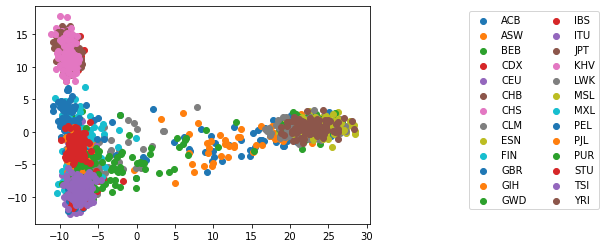

In [9]:
fig, ax = plt.subplots()
merged = pd.merge(pca_output_df, df_metadata.iloc[:,0:2], on = 'sample')
pops = merged.groupby('pop')
for name, group in pops: 
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
    
plt.legend(bbox_to_anchor = (1.7,1), loc = 'upper right', ncol = 2)

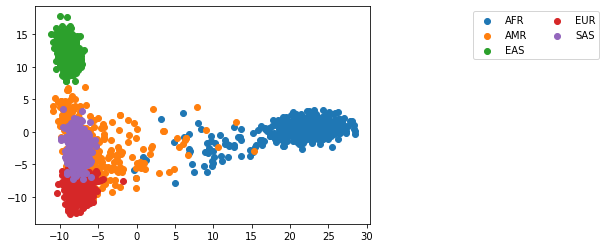

In [10]:
fig, ax = plt.subplots()
merged = pd.merge(pca_output_df, df_metadata.iloc[:,0:3], on = 'sample')
superpops = merged.groupby('super_pop')
for name, group in superpops: 
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
    
plt.legend(bbox_to_anchor = (1.7,1), loc = 'upper right', ncol = 2)

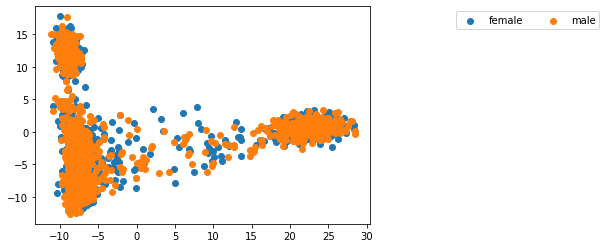

In [11]:
fig, ax = plt.subplots()
merged = pd.merge(pca_output_df, df_metadata.iloc[:,0:4], on = 'sample')
genders = merged.groupby('gender')
for name, group in genders: 
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
    
plt.legend(bbox_to_anchor = (1.7,1), loc = 'upper right', ncol = 2)